# Exploratory Data Analysis

In this Jupyter Notebook i have performed an exploratory data analysis of the data with the final goal of deriving a preprocessing pipeline. 

### Importing Libraries and First Look at Data

In [19]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns


In [20]:
data = pd.read_csv('./data/customer_churn_records.csv')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [22]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


I remove Surname because it contains PII, and I remove RowNumber because I won't need it for the project. Usually CustomerId should be kept because it is a unique identifier, but in this case it can be removed for simplicity. 

In [23]:
data.drop(['RowNumber','CustomerId','Surname'], 
          axis = 1, inplace = True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

I also store variables in lists according to their type.

In [25]:
numerical_variables = ['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Point Earned']

numerical_continuous = ['CreditScore', 'Balance', 'EstimatedSalary', 'Point Earned']

numerical_discrete = ['Age', 'Tenure', 'NumOfProducts', 
                      'HasCrCard', 'IsActiveMember', 'Exited', 
                      'Complain', 'Satisfaction Score']

categorical_variables = ['Geography', 'Gender', 'Card Type']

target = 'Exited'

In [26]:
data.nunique()

CreditScore            460
Geography                3
Gender                   2
Age                     70
Tenure                  11
Balance               6382
NumOfProducts            4
HasCrCard                2
IsActiveMember           2
EstimatedSalary       9999
Exited                   2
Complain                 2
Satisfaction Score       5
Card Type                4
Point Earned           785
dtype: int64

### Missing Data and Duplicates

In [27]:
data[data.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned


There are no duplicates.

In [28]:
missing_values = data.isnull().sum(axis = 0).reset_index()
missing_values = missing_values.rename(columns = {"index":"variable",0:"num_missing_values"})
missing_values['pct_missing_values'] = round((missing_values['num_missing_values'] / len(data)) * 100,2)
missing_values

,variable,num_missing_values,pct_missing_values
0,CreditScore,0,0.0
1,Geography,0,0.0
2,Gender,0,0.0
3,Age,0,0.0
4,Tenure,0,0.0
5,Balance,0,0.0
6,NumOfProducts,0,0.0
7,HasCrCard,0,0.0
8,IsActiveMember,0,0.0
9,EstimatedSalary,0,0.0


There are no missing values. 

### Distributions

C:\Users\fbellucci\AppData\Local\Temp\ipykernel_37908\2554148149.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, ax=ax, palette="tab10")
C:\Users\fbellucci\AppData\Local\Temp\ipykernel_37908\2554148149.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\fbellucci\AppData\Local\Temp\ipykernel_37908\2554148149.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, ax=ax, palette="tab10")
C:\Users\fbellucci\AppData\Local\Temp\ipykernel_37908\2554148149.py:8: UserWarning: set_tick

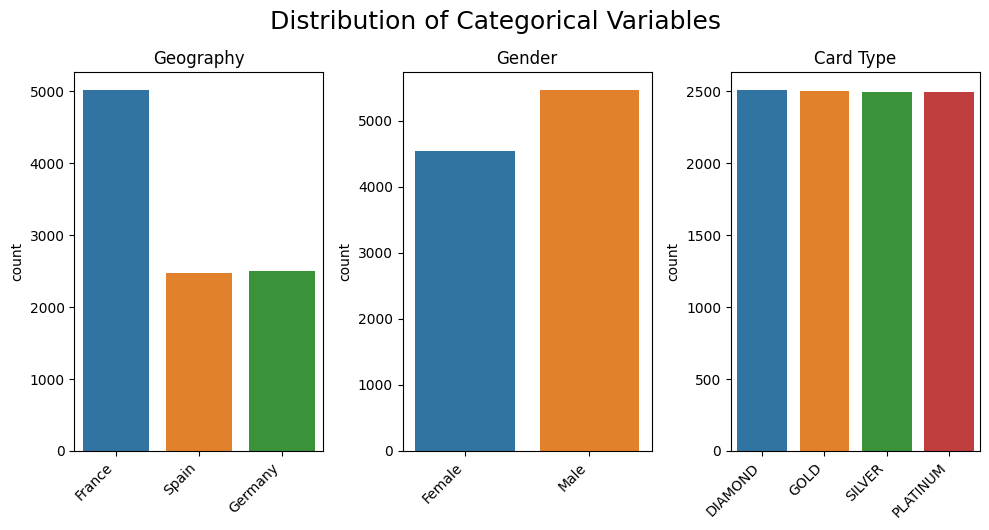

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5), sharex=False, sharey=False)
axes = axes.ravel()  


for col, ax in zip(categorical_variables, axes):
    sns.countplot(data=data, x=col, ax=ax, palette="tab10")
    ax.set(title=f'{col}', xlabel=None)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  

plt.tight_layout()
plt.suptitle('Distribution of Categorical Variables', y=1.05, fontsize = 18)
plt.xticks(rotation=45)
plt.show()

C:\Users\fbellucci\AppData\Local\Temp\ipykernel_37908\2348025266.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\fbellucci\AppData\Local\Temp\ipykernel_37908\2348025266.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\fbellucci\AppData\Local\Temp\ipykernel_37908\2348025266.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\fbellucci\AppData\Local\Temp\ipykernel_37908\2348025266.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of tick

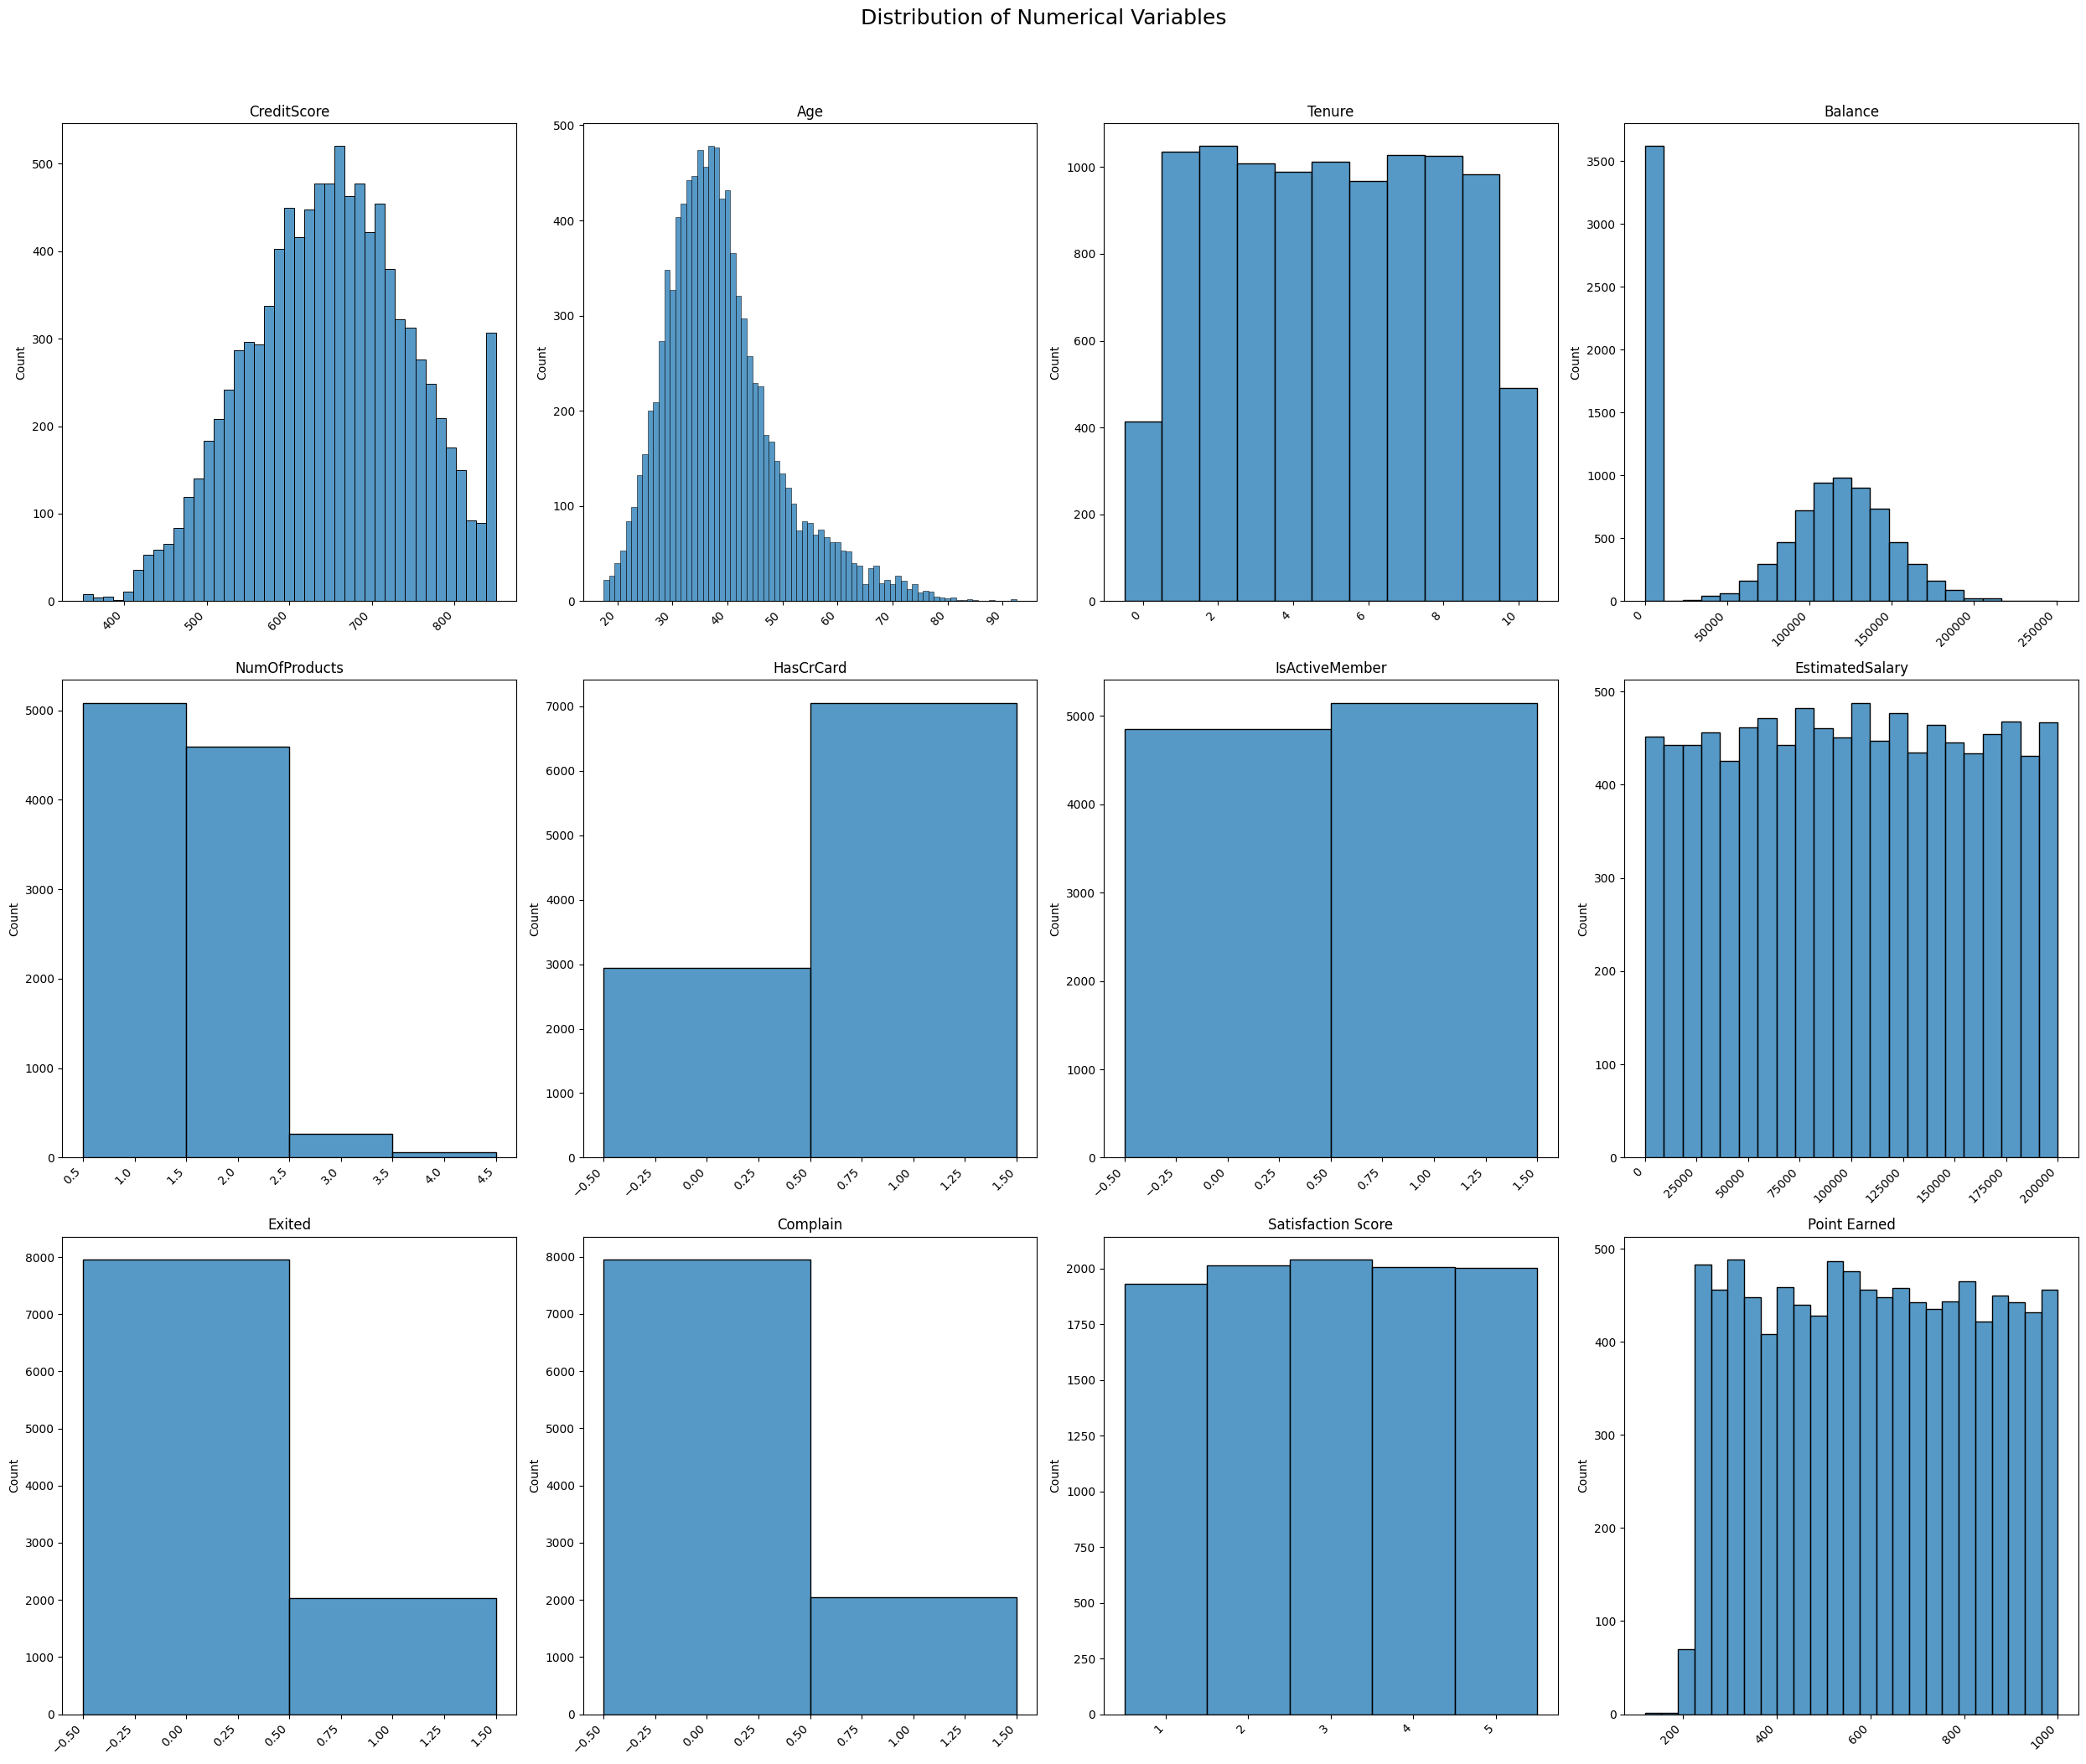

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(25, 20), sharex=False, sharey=False)
axes = axes.ravel()  


for col, ax in zip(numerical_variables, axes):
    sns.histplot(data=data[col], ax=ax, discrete=True if col in numerical_discrete else False)
    ax.set(title=f'{col}', xlabel=None)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  

plt.tight_layout()
plt.suptitle('Distribution of Numerical Variables', y=1.05, fontsize = 18)
plt.xticks(rotation=45)
plt.show()

Exited, which is our target variable, is heavily imbalanced. I will have to use sampling techniques and specific metrics to address this issue.  

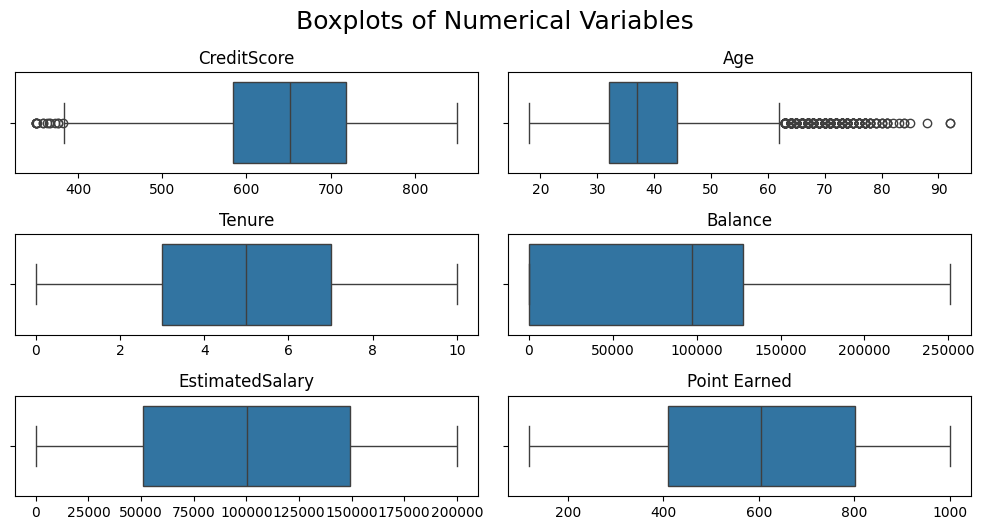

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 5), sharex=False, sharey=False)
axes = axes.ravel()  
cols = ['CreditScore', 'Age', 'Tenure', 'Balance',
        'EstimatedSalary', 'Point Earned']

for col, ax in zip(cols, axes):
    sns.boxplot(data=data, x =col, ax=ax)
    ax.set(title=f'{col}', xlabel=None)
    
fig.tight_layout()
plt.suptitle("Boxplots of Numerical Variables", y=1.05, fontsize=18)
plt.show()

Age has a lot of outliers. In the next section we will see to which extent they affect the outcome. 

### Relationships Between Variables

<Axes: >

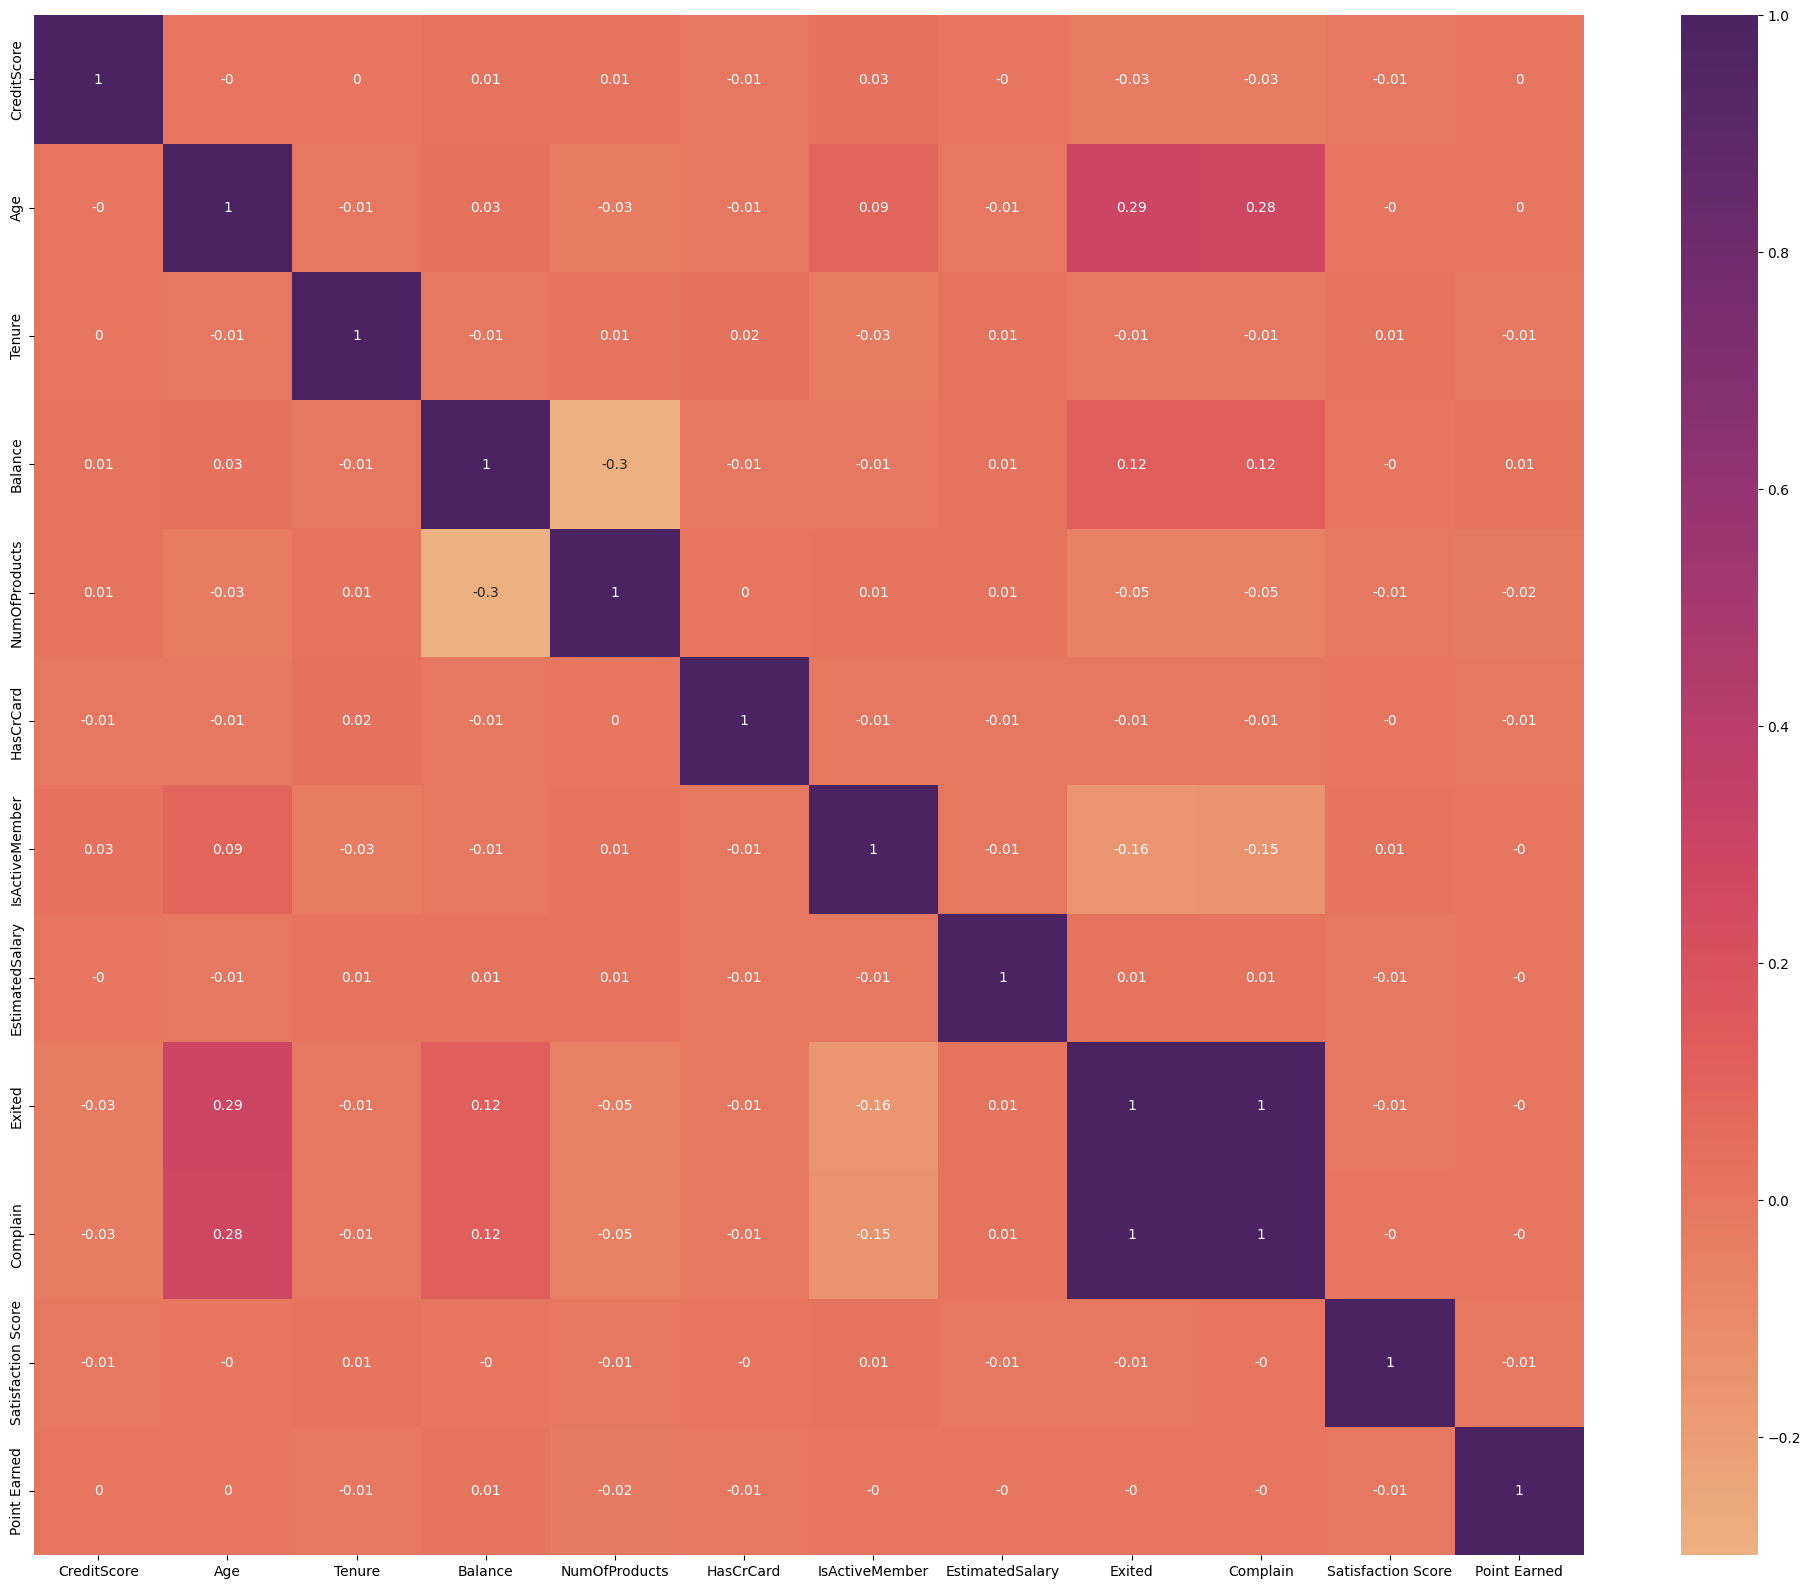

In [32]:
corr = data[numerical_variables].corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'flare')

The correlation coefficients are all low

C:\Users\fbellucci\AppData\Local\Temp\ipykernel_37908\873760883.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\fbellucci\AppData\Local\Temp\ipykernel_37908\873760883.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\fbellucci\AppData\Local\Temp\ipykernel_37908\873760883.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\fbellucci\AppData\Local\Temp\ipykernel_37908\873760883.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i

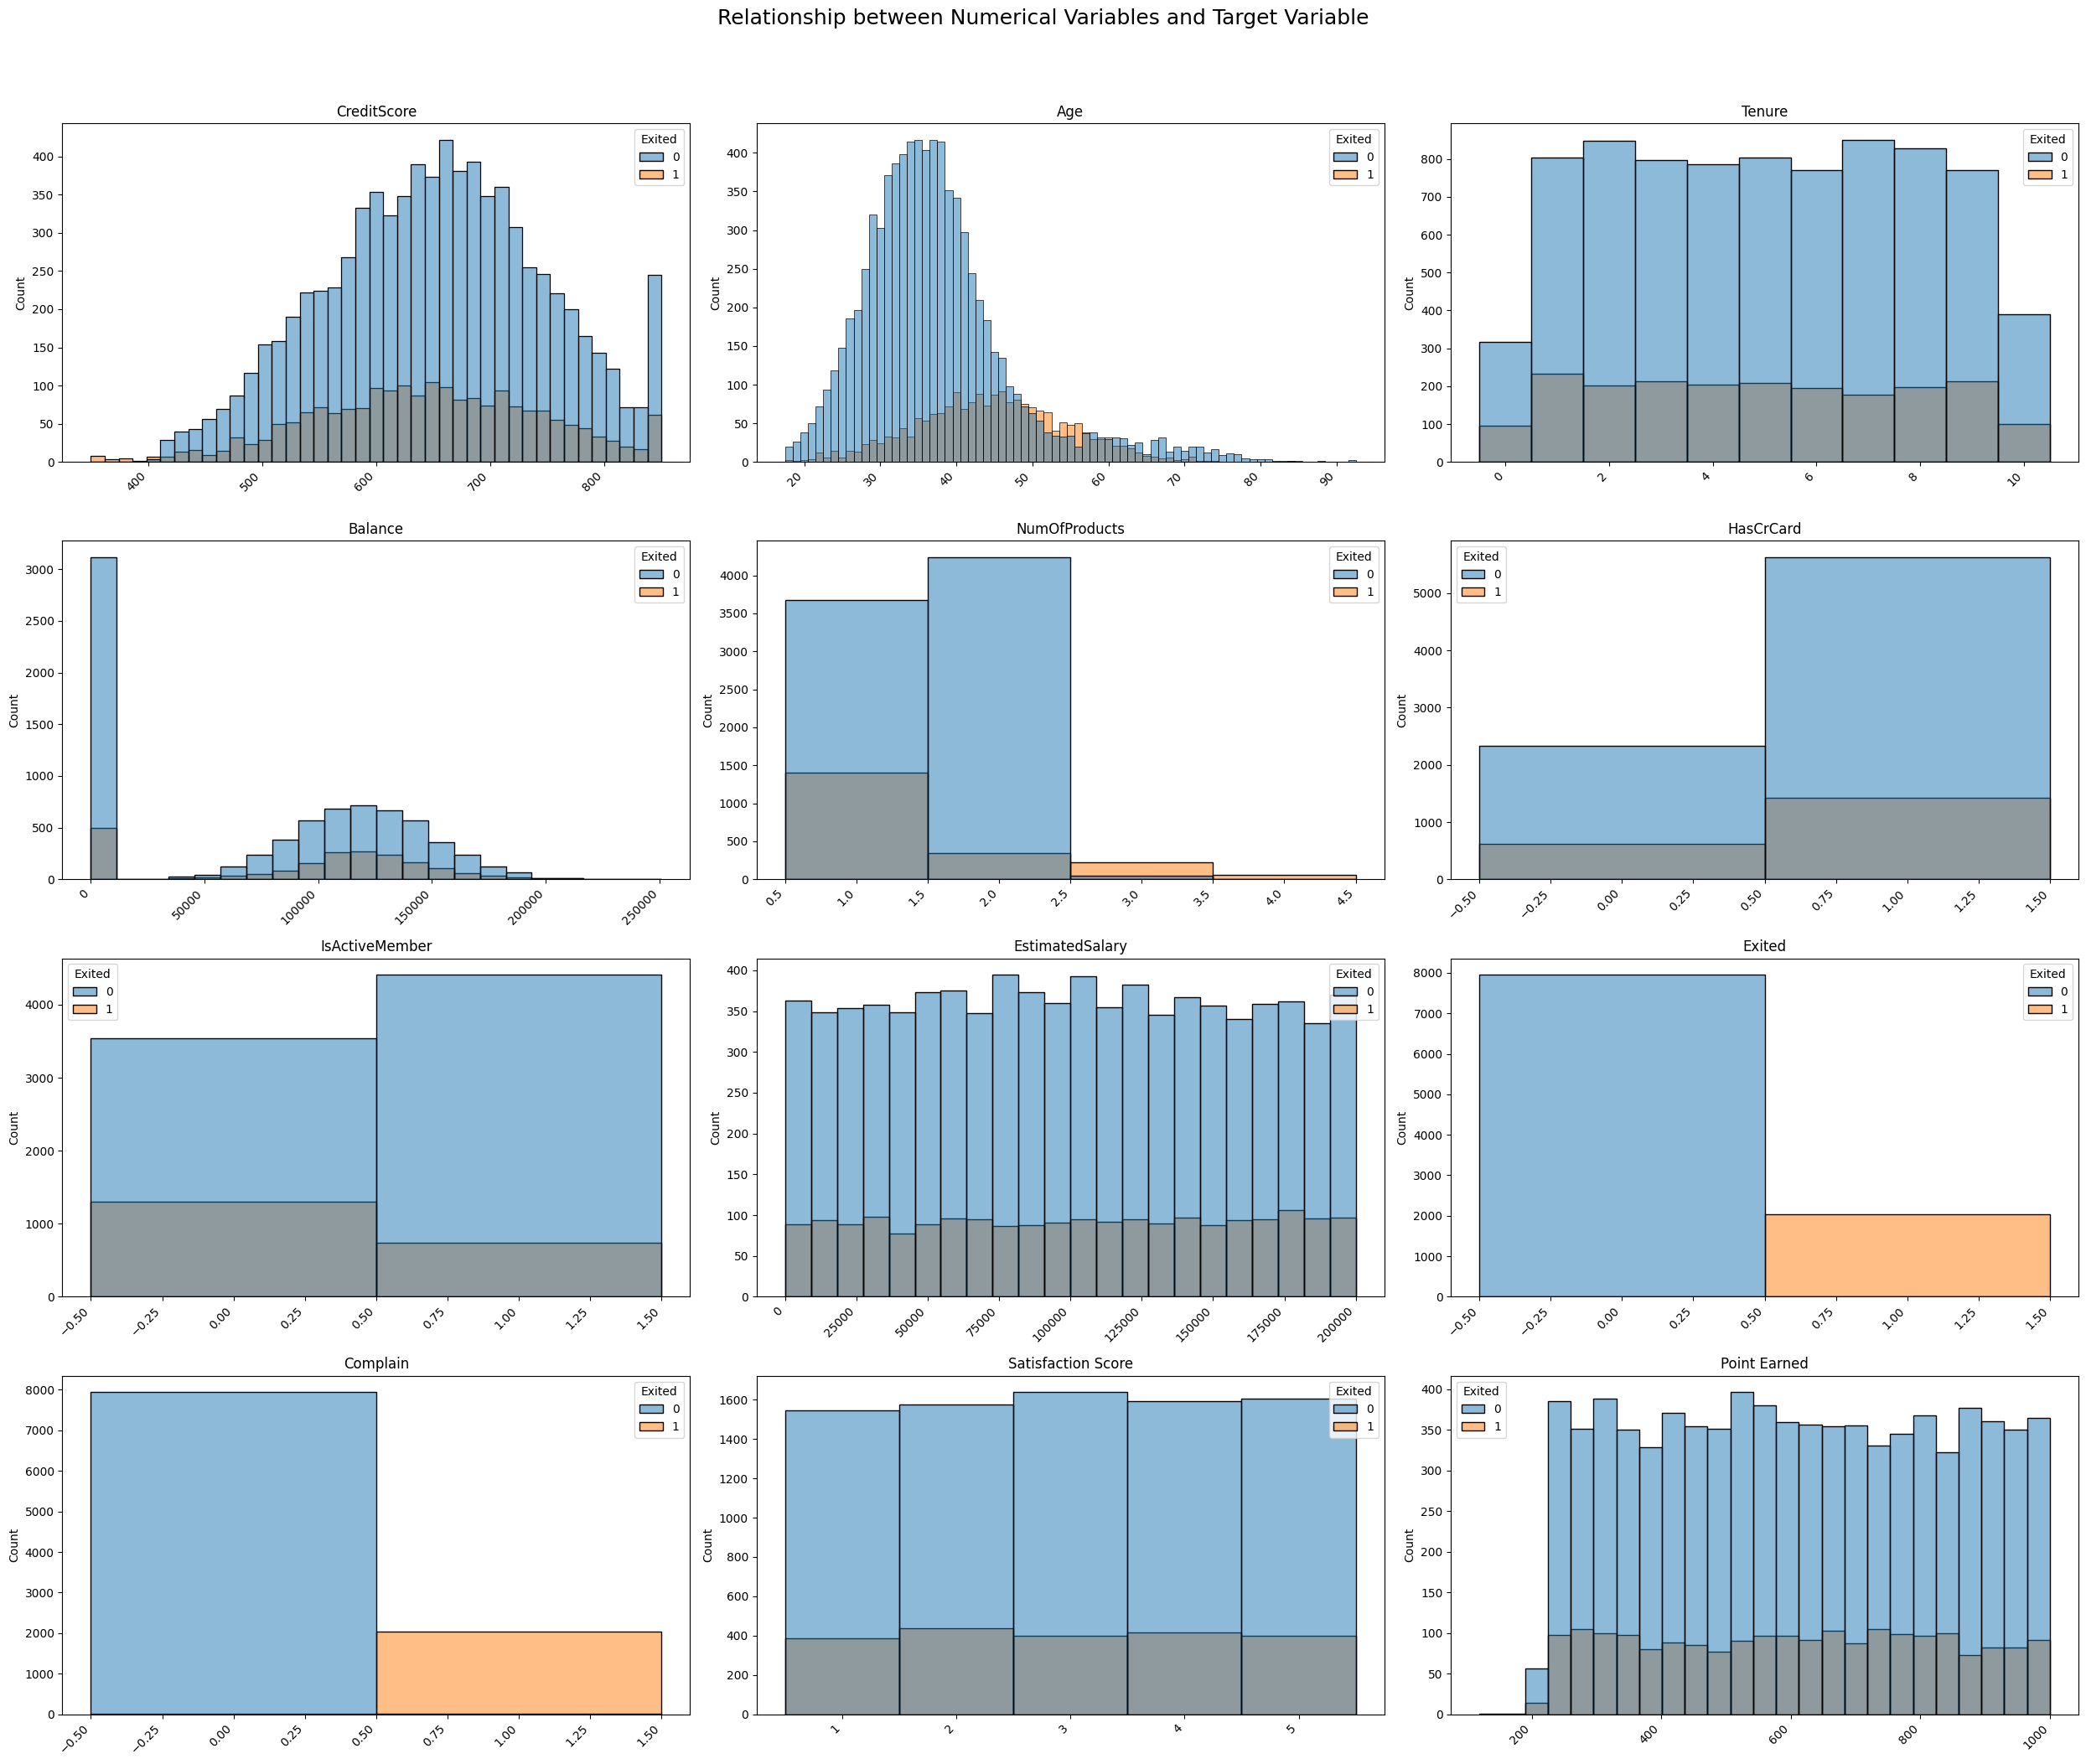

In [33]:
sns.set_style(None)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 20), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D

for col, ax in zip(numerical_variables, axes):
    sns.histplot(data=data, x=col, hue='Exited', ax=ax, discrete=True if col in numerical_discrete else False)
    ax.set(title=f'{col}', xlabel=None)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    
fig.tight_layout()
plt.suptitle("Relationship between Numerical Variables and Target Variable", y=1.05, fontsize=18)
plt.show()

We can note that a low credit, a high number of products, and the presence of complaints are most often related to an exit. The distribution of age is normal/binomial for exiting clients and skewed (probably Gamma, Weibull or Poisson) for customers that stay. It might be worth it to perform an anomaly detection on Age to get more accurate results. 

C:\Users\fbellucci\AppData\Local\Temp\ipykernel_37908\2174337411.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\fbellucci\AppData\Local\Temp\ipykernel_37908\2174337411.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\fbellucci\AppData\Local\Temp\ipykernel_37908\2174337411.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


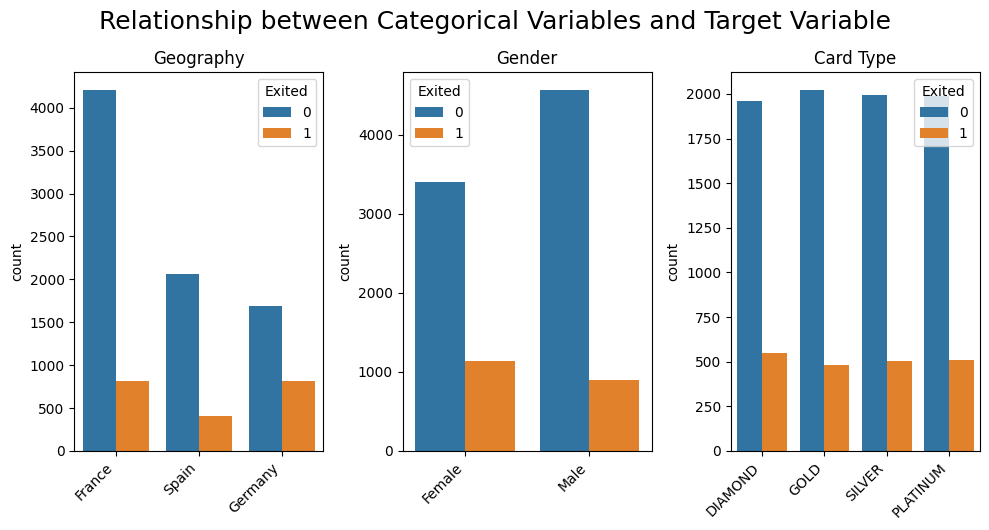

In [34]:
sns.set_style(None)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D

for col, ax in zip(categorical_variables, axes):
    sns.countplot(data=data, x=col,  hue='Exited', ax=ax)
    ax.set(title=f'{col}', xlabel=None)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    
fig.tight_layout()
plt.suptitle("Relationship between Categorical Variables and Target Variable", y=1.05, fontsize=18)
plt.show()

Categorical variables don't affect the outcome significantly. 

### Conclusions

The data is very clean and requires minimal preprocessing. Assuming that any additional data we might receive will have similar caracteristics, the procedure to follow for preprocessing is the following: 
* Remove the variables RowNumber, CustomerId, Surname
* Store the names of categorical variables in a list and target as target

The data preparation part will be analyzed in another notebook containing the first model experiments. 